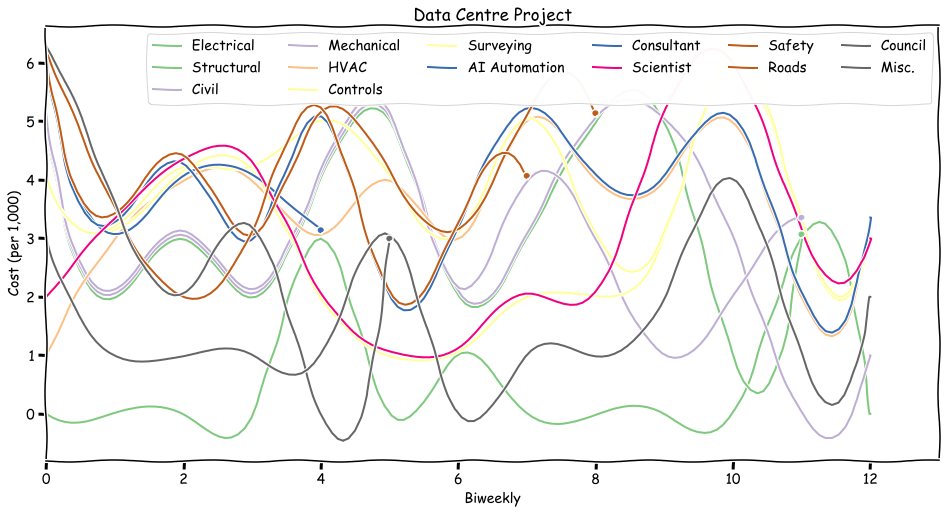

In [150]:
# Python3 with numpy, scipy and matplotlib

chars = [
        "Electrical","Structural","Civil","Mechanical","HVAC","Controls","Surveying",
        "AI Automation","Consultant","Scientist","Safety","Roads","Council","Misc."
    ]
events = [
    [[0],[1,2,3],[4],[5,6],[7,8,10,11,12],[9],[13]],
    [[0],[1,2,3],[4,7,5,6,8,9,10,11,12],[13]],
    [[0],[1,2,3],[4,7,5,6,8,9,10],[11,12],[13]],
    [[0],[1,2,3],[4,7,5,6,9],[8,10,11,12],[13]],
    [[0,4,7],[1,2,3],[5,9],[6,8,10,11],[12],[13]],
    [7],
    [[5,9],[0],[4,6,10],[1,2,3],[8,11],[12,13]],
    [12],
    [[0,5,9],[1,2,3],[4,6,10,8,11],[13]],
    [[0],[5,9],[1,2],[3,11],[4,6,10,8],[13]],
    [11],
    [[0],[5,9],[1,2,10],[3,6],[4,8],[13]],
    [10],
    [[0],[1,2,9],[5,6],[3],[4,8],[13]],
    [[0],[1],[9,5,6],[3],[4,8],[2],[13]],
    [[0,1,9,5,6,3],[4,8],[2],[13]],
    [1,3],
    [[0],[9,5,6,3,4,8],[2],[13]]
]

def parse_data(chars, events):
    chars = dict(enumerate(chars))
    progress= {}

    def living_len():
        return len(chars) - len(progress)

    def position(char, event):
        for i, group in enumerate(event):
            if char in group:
                return i + group.index(char) / len(chars)
        return None

    timelines = {char: [] for char in chars}

    t = 0
    for event in events:
        if isinstance(event[0], list):
            event.sort(key=len)
            for char in [c for c in chars if c not in progress]:
                timelines[char] += [position(char, event)]
            t += 1
        else:
            for char in set(event) - set(progress):
                progress[char] = (t-1, timelines[char][-1])

    return chars, timelines, progress

def plot_data(chars, timelines, progress):
    import numpy as np
    from scipy.interpolate import interp1d
    from matplotlib import cm, pyplot as plt

    plt.xkcd()  
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    ax.xaxis.set_label_text('Biweekly')
    ax.set_xlim([0, max(map(len, timelines.values()))])
    ax.yaxis.set_label_text('Cost (per 1,000)')
    ax.set_title('Data Centre Project')

    color_floats = np.linspace(0, 1, len(chars))
    def color(char):
        return cm.Accent(color_floats[char])

    for char_id in sorted(chars):
        y = timelines[char_id]
        f = interp1d(np.linspace(0, len(y)-1, len(y)), y, kind=3)
        x = np.linspace(0, len(y)-1, len(y)*10)
        ax.plot(x, f(x), c=color(char_id))
        fig.savefig('testplot.png')

    x, y = zip(*progress.values())
    for char_id, xy in progress.items():
        circle = plt.Circle(xy, color=color(char_id), zorder=100, radius=0.03)
        ax.add_artist(circle)
    ax.legend(list(map(chars.get, sorted(chars))), loc='best', ncol=6)

plot_data(*parse_data(chars, events))